<a href="https://colab.research.google.com/github/Giovannasmoura/neural-network-series/blob/main/2%C2%BA_Teste_com_Perceptron_Multicamadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importanto pacotes para trabalhar com Perceptron

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
# Separação dos dados de teste e treino
from sklearn.model_selection import train_test_split
# Pacotes para averiguar a acuracia do treinamento
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
# Manipulação dos dados
import numpy as np
import pandas as pd

# Tratamento de Base de Dados


In [2]:
# Importando a base de dados

from google.colab import files
uploaded=files.upload()
import io


Saving diabetes.csv to diabetes.csv


In [3]:
# Importando a base de dados
original_data = pd.read_csv("diabetes.csv", sep=',')
# O "iloc" acessa cada posição da tabela, os ":" significa acessar todas as linha e "1:" remove a 1º coluna.
data = original_data.iloc[:, 1:]
# Os ":" acessa todas as linhas e o ":-1" remove a ultima coluna que é se a pessoa tem diabetes ou não.
X = data.iloc[:, :-1]
# o "Y" é o que eu quero que a rede acerte
y = data.iloc[:, -1:]

print(len(X))

767


# Separando os dados de treino e teste em uma tabela única

Quando temos uma única tabela, temos que selecionar dentro dela os dados de treino e teste. Abaixo selecionamos "0.15", ou seja, 15% para dado de teste e o reste vai ser usado como dados de treino. 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

Para a rede neural funcionar bem é importante que todas as colunas sejam caracterizadas em números entre -1 e +1. Para isso, vamos utilizar o 'StandardScaler'. Depois, vamos treinar usando a base de teste e depois vamos excutar com as bases de treino e teste.

In [5]:
#comentar feature scaling segundo o livro do rashcka
#falar do efeito positivo da normalização para o método do gradiente, demanda menos etapas para convergir
sc = StandardScaler()
sc.fit(X_train)

X_train_scaled = sc.transform(X_train.values)
X_test_scaled = sc.transform(X_test.values)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


# Perceptron

Na linha de código abaixo foi descrito o máx de 1000 interações e no "eta" (taxa de aprendizado) vai ser de 0.15 (um numero equilibrado).



In [6]:
ppn = Perceptron(max_iter=1000, eta0=0.15) 
ppn.fit(X_train, y_train.values.ravel())

# O uso do "ravel" deixa as colunas em um modo vetorizado, no qual o Perceptron entende.

Perceptron(eta0=0.15)

O "pred" vai treinar a rede com os dados de teste

In [7]:
y_pred = ppn.predict(X_test)

In [8]:
# Vamos averiguar agora os resultados dos testes
confusion_matrix(y_test, y_pred)

array([[44, 34],
       [14, 24]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


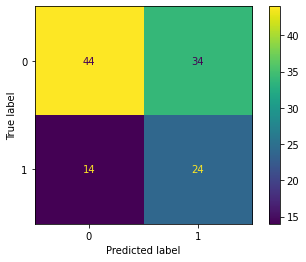

In [9]:
plot_confusion_matrix(ppn, X_test, y_test)

Na matrix confusion acima:

zero (0) no true label =50, são as pessoas que não tem diabetes e a rede ACERTOU.

o 11 são as pessoas que não tem diabetes e a rede disse que tem ERROU.

Zero (0) no predicted label, 40 são as pessoas que tem diabetes e a rede falou que não tem. ERROU

Um (1) no predicted label, são as pessoas que tem diabetes que a rede ACERTOU.

**REFAZER**

In [10]:
# Para averiguar a acuracia
accuracy_score(y_test, y_pred)

0.5862068965517241

# Perceptron Multicamada

Vamos utilizar agora no lugar da "sklearn" o "tensorflow" para obter melhores resultados, ela é muito utilizada em deeplearning.
  

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [12]:
import random as python_random

SEED = 0

np.random.seed(SEED)
python_random.seed(SEED)
tf.random.set_seed(SEED)

In [13]:
ann = keras.Sequential()
ann.add(layers.Dense(6, activation='relu'))
ann.add(layers.Dense(1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

O que difere do treinamento antes, agora a "**Epochs**" será de 2000, ou seja, haverá 2000 interações. 

In [14]:
ann.fit(X_train, y_train, batch_size=16, epochs=2000)

Epoch 1/2000
41/41 [==============================] - 1s 2ms/step - loss: 11.6369 - accuracy: 0.3579
Epoch 2/2000
41/41 [==============================] - 0s 2ms/step - loss: 3.1329 - accuracy: 0.4869
Epoch 3/2000
41/41 [==============================] - 0s 2ms/step - loss: 1.6546 - accuracy: 0.6114
Epoch 4/2000
41/41 [==============================] - 0s 2ms/step - loss: 1.4892 - accuracy: 0.6160
Epoch 5/2000
41/41 [==============================] - 0s 2ms/step - loss: 1.3909 - accuracy: 0.6206
Epoch 6/2000
41/41 [==============================] - 0s 2ms/step - loss: 1.3052 - accuracy: 0.6252
Epoch 7/2000
41/41 [==============================] - 0s 2ms/step - loss: 1.2232 - accuracy: 0.6313
Epoch 8/2000
41/41 [==============================] - 0s 2ms/step - loss: 1.1530 - accuracy: 0.6313
Epoch 9/2000
41/41 [==============================] - 0s 2ms/step - loss: 1.0933 - accuracy: 0.6375
Epoch 10/2000
41/41 [==============================] - 0s 2ms/step - loss: 1.0488 - accuracy: 0.632

In [15]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

In [16]:
confusion_matrix(y_test, y_pred)

array([[68, 10],
       [15, 23]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


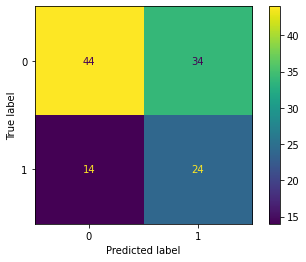

In [17]:
plot_confusion_matrix(ppn, X_test, y_test) 

In [18]:
accuracy_score(y_test, y_pred)

0.7844827586206896